1 - Packages
First, let's run the cell below to import all the packages that you will need during this assignment.

   1) numpy is the fundamental package for working with matrices in Python.
    2) matplotlib is a famous library to plot graphs in Python.
    3) utils.py contains helper functions for this assignment. You do not need to modify code in this file.

In [85]:
#import the packages first  

import numpy as np
import matplotlib.pyplot as plt
from utils import*
import copy 
import math 
%matplotlib inline 

2 - Problem Statement
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
The chain already has restaurants in various cities and you have data for profits and populations from the cities.
You also have data on cities that are candidates for a new restaurant.
For these cities, you have the city population.
Can you use the data to help you identify which cities may potentially give your business higher profits?

3 - Dataset
You will start by loading the dataset for this task.

The load_data() function shown below loads the data into variables x_train and y_train
x_train is the population of a city
y_train is the profit of a restaurant in that city. A negative value for profit indicates a loss.
Both X_train and y_train are numpy arrays.

In [86]:
#load the data 
x_train ,y_train = load_data()

View the variables
Before starting on any task, it is useful to get more familiar with your dataset.

A good place to start is to just print out each variable and see what it contains.
The code below prints the variable x_train and the type of the variable.

In [87]:
#print the x train 
print("type of x_train:",type(x_train))
print("first five element of the x_train are \n",x_train[:5])


type of x_train: <class 'numpy.ndarray'>
first five element of the x_train are 
 [6.1101 5.5277 8.5186 7.0032 5.8598]


x_train is a numpy array that contains decimal values that are all greater than zero.

These values represent the city population times 10,000
For example, 6.1101 means that the population for that city is 61,101
Now, let's print y_train

In [88]:
#print the y train 
print("type of y_train:",type(y_train))
print("first five element of the y_train are \n",y_train[:5])

type of y_train: <class 'numpy.ndarray'>
first five element of the y_train are 
 [17.592   9.1302 13.662  11.854   6.8233]


Similarly, y_train is a numpy array that has decimal values, some negative, some positive.

These represent your restaurant's average monthly profits in each city, in units of $10,000.
For example, 17.592 represents $175,920 in average monthly profits for that city.
-2.6807 represents -$26,807 in average monthly loss for that city.

Check the dimensions of your variables
Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of x_train and y_train and see how many training examples you have in your dataset.

In [89]:
print("the shape of the x_train is: ",x_train.shape)
print("the shape of the y_train is: ",y_train.shape)
print("number of training examples (m)",len(x_train))

the shape of the x_train is:  (97,)
the shape of the y_train is:  (97,)
number of training examples (m) 97


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

Visualize your data
It is often useful to understand the data by visualizing it.

For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.

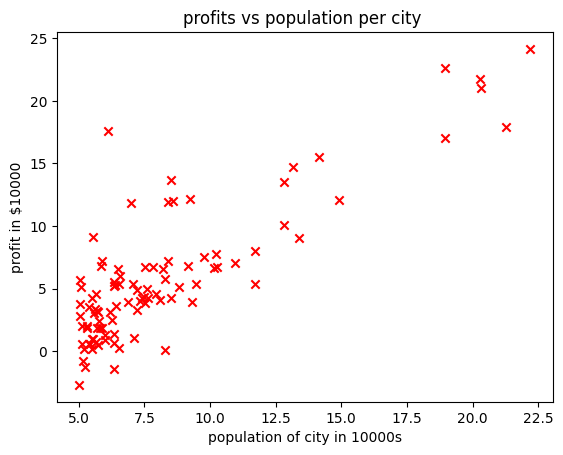

In [90]:
#create a scatter plot of the data . To change the markers to red 'x'
#we udes the 'marker' and 'c' parameters 
plt.scatter(x_train,y_train,marker='x',c='r')
#marker is cross and the color is red we can change it to blue also 
#set the ttitle 
plt.title("profits vs population per city ")
#set the y axis label 
plt.ylabel('profit in $10000')
#set the lable for x axis
plt.xlabel('population of city in 10000s')
plt.show()

Your goal is to build a linear regression model to fit this data.

With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

In [91]:
def compute_cost(x,y,w,b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               t
    """
    #number of training examples
    m = len(x)

    total_cost = 0 #it will store the cost after all the calculations 

    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    
    total_cost = cost/(2*m)

    #return the final cost of the function
    return total_cost

to check if the code runs perfectly we can run the following code 

In [92]:
#compute cost with somoe initial values 
initial_w = 2
initial_b = 1

cost = compute_cost(x_train,y_train,initial_w,initial_b)
print(type(cost))
print(f'cost at the initial w (zeros) : {cost:.3f}')

#public tests
from public_tests import * #for the test cases we will use this 
compute_cost_test(compute_cost)

<class 'numpy.float64'>
cost at the initial w (zeros) : 75.203
All test passed 
All test passed


now we will compute the graddient desent


In [93]:
def compute_gradient(x,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # number of training examples 
    m = len(x)

    #the follwing are the varibles or differential terms 
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_db = dj_db + (f_wb - y[i])
        dj_dw = dj_dw + (f_wb - y[i])*x[i]

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    #now return 
    return dj_dw,dj_db

now we will run the test for the gradient 

In [94]:
#compute the dispalu gradeint with w initialised to zeros
initial_w = 0
initial_b = 0

tmp_dj_dw,tmp_dj_db = compute_gradient(x_train,y_train,initial_w,initial_b)
print('gradient at the initial w,b (zeros):',tmp_dj_dw,tmp_dj_db)

compute_gradient_test(compute_gradient)

gradient at the initial w,b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [95]:
#compute and display cost and gradient with the non zero w

test_w = 0.2
test_b = 0.2

tmp_dj_dw,tmp_dj_db = compute_gradient(x_train,y_train,test_w,test_b)

print('gradient at test w,b:',tmp_dj_dw,tmp_dj_db)

gradient at test w,b: -47.41610118114435 -4.007175051546391


now we will implement the batch gradient desent in which we will train our model with the help of examples 


In [96]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    #m is the number of training examples 
    m = len(x)

    #an array to store j and w over each iteration primalarily for  the later graphing 
    j_history = []
    w_history = []

    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        #calculate the gradient decent and update the parameters 
        dj_dw,dj_db = gradient_function(x,y,w,b)

        #update the parameters using w , b ,alpha and the update the parameters 

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        #save the j at each iteration
        if i<10000: #prevent resource exhaustion
            cost = cost_function(x,y,w,b)
            j_history.append(cost)

        #print cost at every intervals 10 times or as many iterations if < 10

        if i%math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"iteration {i:4} : cost {float(j_history[-1]) : 8.2f}  ")

    return w,b,j_history,w_history #return w and j , w for history of graphing 

now lets run the gradient descent algo above to learn the parameters for our dataset 

In [97]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

iteration    0 : cost     6.74  
iteration  150 : cost     5.31  
iteration  300 : cost     4.96  
iteration  450 : cost     4.76  
iteration  600 : cost     4.64  
iteration  750 : cost     4.57  
iteration  900 : cost     4.53  
iteration 1050 : cost     4.51  
iteration 1200 : cost     4.50  
iteration 1350 : cost     4.49  
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [98]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

Text(0.5, 0, 'Population of City in 10,000s')

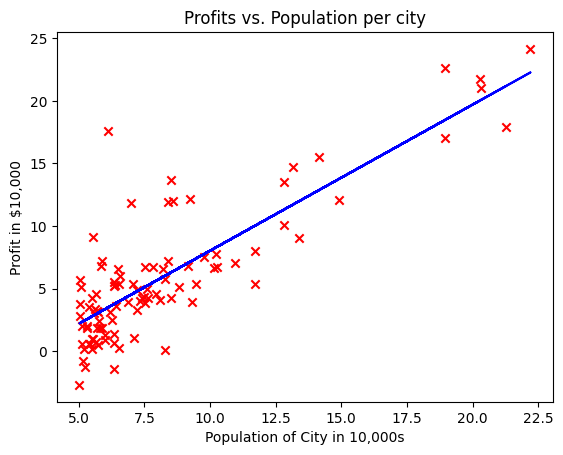

In [99]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

now we will finally predict the valuea based of our training model 


In [100]:
x  = float(input("enter the population of the restaurant"))
x_i = x/10000
predict1 = x_i* w + b
print('For population = {x_i}, we predict a profit of $%.2f' % (predict1*10000))


For population = {x_i}, we predict a profit of $313605.79
